## 1.
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy.  
Полученные значения должны быть равны.  
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,  
а затем с использованием функций из библиотек numpy и pandas. 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
r = np.corrcoef(zp, ks)
r[0][1]

0.8874900920739162

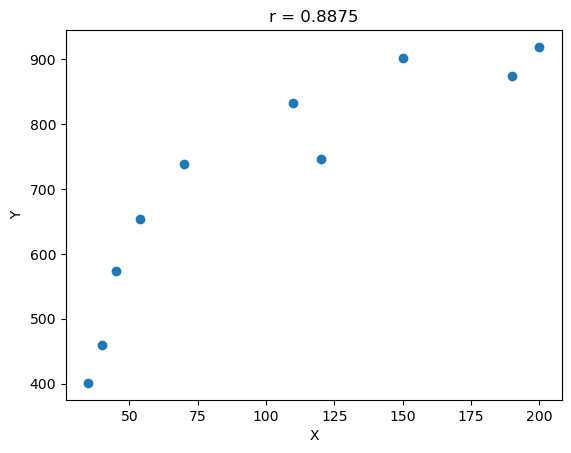

In [4]:
plt.scatter(zp, ks)
plt.title(f'r = {round(r[0][1], 4)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Из графика видно, что зависимость линейная. Ожидаем, что между этими данными существует положительная корреляция.  
Вычислим ковариацию двух величин с помощью элементарных действий:  $Сov(xy) = M(XY) - M(X)*M(Y)$

In [5]:
np.mean(zp * ks) - np.mean(zp) * np.mean(ks)

9157.839999999997

In [6]:
np.cov(zp, ks, ddof=0)[0, 1]

9157.84

Вычислим коэффициент корреляции Пирсона с помощью ковариации: $corr(zp, ks) = \frac{Cov(zp, ks)}{\sqrt{Var(zp)}\sqrt{Var(ks)}}$  

In [7]:
np.cov(zp, ks, ddof=0)[0, 1] / (np.std(zp) * np.std(ks))

0.8874900920739162

Вычислим среднеквадратичных отклонений двух признаков: $r = \frac{\operatorname{cov}(zp, ks)}{\sigma_{zp} \sigma_{ks}}$  

In [8]:
np.cov(zp, ks, ddof=0)[0, 1] / (np.std(zp, ddof=0) * np.std(ks, ddof=0))

0.8874900920739162

In [9]:
np.corrcoef(zp, ks)[0][1]

0.8874900920739162

In [10]:
pd.Series(zp).corr(pd.Series(ks), method='pearson')

0.8874900920739162

## 2.
Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:  
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.  
Известно, что в генеральной совокупности IQ распределен нормально.  
Найдите доверительный интервал для математического ожидания с надежностью 0.95.  

Так как дисперсия генеральной совокупности неизвестна, вычисляем ее по выборке, используя формулу для несмещенного стандартного отклонения.   
  
$\displaystyle\bar X\pm t_{\alpha/2}\cdot\frac{\sigma}{\sqrt{n}}$  


Размер выборки: $n=10$,  $\alpha=0,05$   

In [11]:
arr = [131, 125, 115, 122, 131, 115, 107, 99, 125, 111]
n = 10
x = np.mean(arr)
print(f'Среднее арифметическое выборки: {round(x, 4)}')

Среднее арифметическое выборки: 118.1


In [12]:
sigma = np.std(arr, ddof = 1)
print(f'Среднее квадратическое отклонение по выборке: {round(sigma, 4)}')

Среднее квадратическое отклонение по выборке: 10.5457


In [13]:
alpha = 0.05
za = stats.t.ppf(1 - alpha / 2, n - 1)
print(f'Значение t-критерия для {1 - alpha}% доверительного интервала: {round(sigma, 4)}')

Значение t-критерия для 0.95% доверительного интервала: 10.5457


In [14]:
l1 = x - za * sigma / n**0.5
l2 = x + za * sigma / n**0.5
print(f'Доверительный интервал: [{round(l1, 4)}; {round(l2, 4)}]')

Доверительный интервал: [110.5561; 125.6439]


## 3.
Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см.  
Объем выборки равен 27, среднее выборочное составляет 174.2.  
Найдите доверительный интервал для математического ожидания с надежностью 0.95.  

Нам известны и среднее и дисперсия генеральной совокупности, соответственно для проверки гипотезы будем использовать $z$-критерий.  
Формула нахождения доверительного интервала  
  
$\bar X\pm z_{\alpha/2}\cdot\frac{\sigma}{\sqrt n}$   

Размер выборки: $n=27$  
Среднее значение выборки: $\bar X=174.2$  
Среднее квадратическое отклонение генеральной совокупности: $\sigma=\sqrt{D(X)}=\sqrt {25}=5$  

In [15]:
p = 0.95
n = 27
x = 174.2
d = 25
sigma = d**0.5
alpha = 1 - p
za = stats.norm.ppf(1 - alpha / 2)

l1 = x - za * sigma / n**0.5
l2 = x + za * sigma / n**0.5
print(f'Доверительный интервал: [{round(l1, 4)}; {round(l2, 4)}]')


Доверительный интервал: [172.314; 176.086]
